**About Dataset**

---


constructed using data from the National Center for Education Statistics Annual Digest. Table 330.20: Average undergraduate tuition and fees, as well as room and board rates, charged to full-time students at degree-granting postsecondary institutions, by control and level of institution, state or jurisdiction.

**Average cost of undergraduate student by state USA**

1.   Year:-The Digest year this information comes from
2.   State:-The U.S. State
3.   Type:-Type of University, Private or Public and in-stateor         out-of-state. Private colleges charge the same for in/out of state
4.   Length:-Whether the college mainly offers 2-year (Associates) or 4-year (Bachelors) programs
5.   Expense:-The Expense being described, tuition/fees or on-campus living expenses
6.   Value:-The average cost for this particular expense, in USD ($)







In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import OrdinalEncoder



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error


In [ ]:
df=pd.read_csv("nces330_20.csv")
df.head()

,Year,State,Type,Length,Expense,Value
0,2013,Alabama,Private,4-year,Fees/Tuition,13983
1,2013,Alabama,Private,4-year,Room/Board,8503
2,2013,Alabama,Public In-State,2-year,Fees/Tuition,4048
3,2013,Alabama,Public In-State,4-year,Fees/Tuition,8073
4,2013,Alabama,Public In-State,4-year,Room/Board,8473


In [ ]:
df.describe()

,Year,Value
count,3548.000000,3548.000000
mean,2016.923337,13027.720124
std,2.553910,8734.568645
min,2013.000000,1225.000000
25%,2015.000000,7756.750000
50%,2017.000000,10203.500000
75%,2019.000000,14830.750000
max,2021.000000,49152.000000


In [ ]:
df.isna().sum()

Year       0
State      0
Type       0
Length     0
Expense    0
Value      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3548 entries, 0 to 3547
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Year     3548 non-null   int64 
 1   State    3548 non-null   object
 2   Type     3548 non-null   object
 3   Length   3548 non-null   object
 4   Expense  3548 non-null   object
 5   Value    3548 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 166.4+ KB


In [ ]:
catcol=df.select_dtypes(object).columns

In [ ]:
oe=OrdinalEncoder()
df[catcol]=oe.fit_transform(df[catcol])   #convert object column to numeric column

In [ ]:
df.describe()

,Year,State,Type,Length,Expense,Value
count,3548.000000,3548.000000,3548.000000,3548.000000,3548.000000,3548.000000
mean,2016.923337,25.180665,1.124577,0.753100,0.380496,13027.720124
std,2.553910,14.618571,0.787006,0.431269,0.485577,8734.568645
min,2013.000000,0.000000,0.000000,0.000000,0.000000,1225.000000
25%,2015.000000,13.000000,0.000000,1.000000,0.000000,7756.750000
50%,2017.000000,25.000000,1.000000,1.000000,0.000000,10203.500000
75%,2019.000000,38.000000,2.000000,1.000000,1.000000,14830.750000
max,2021.000000,50.000000,2.000000,1.000000,1.000000,49152.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3548 entries, 0 to 3547
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     3548 non-null   int64  
 1   State    3548 non-null   float64
 2   Type     3548 non-null   float64
 3   Length   3548 non-null   float64
 4   Expense  3548 non-null   float64
 5   Value    3548 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 166.4 KB


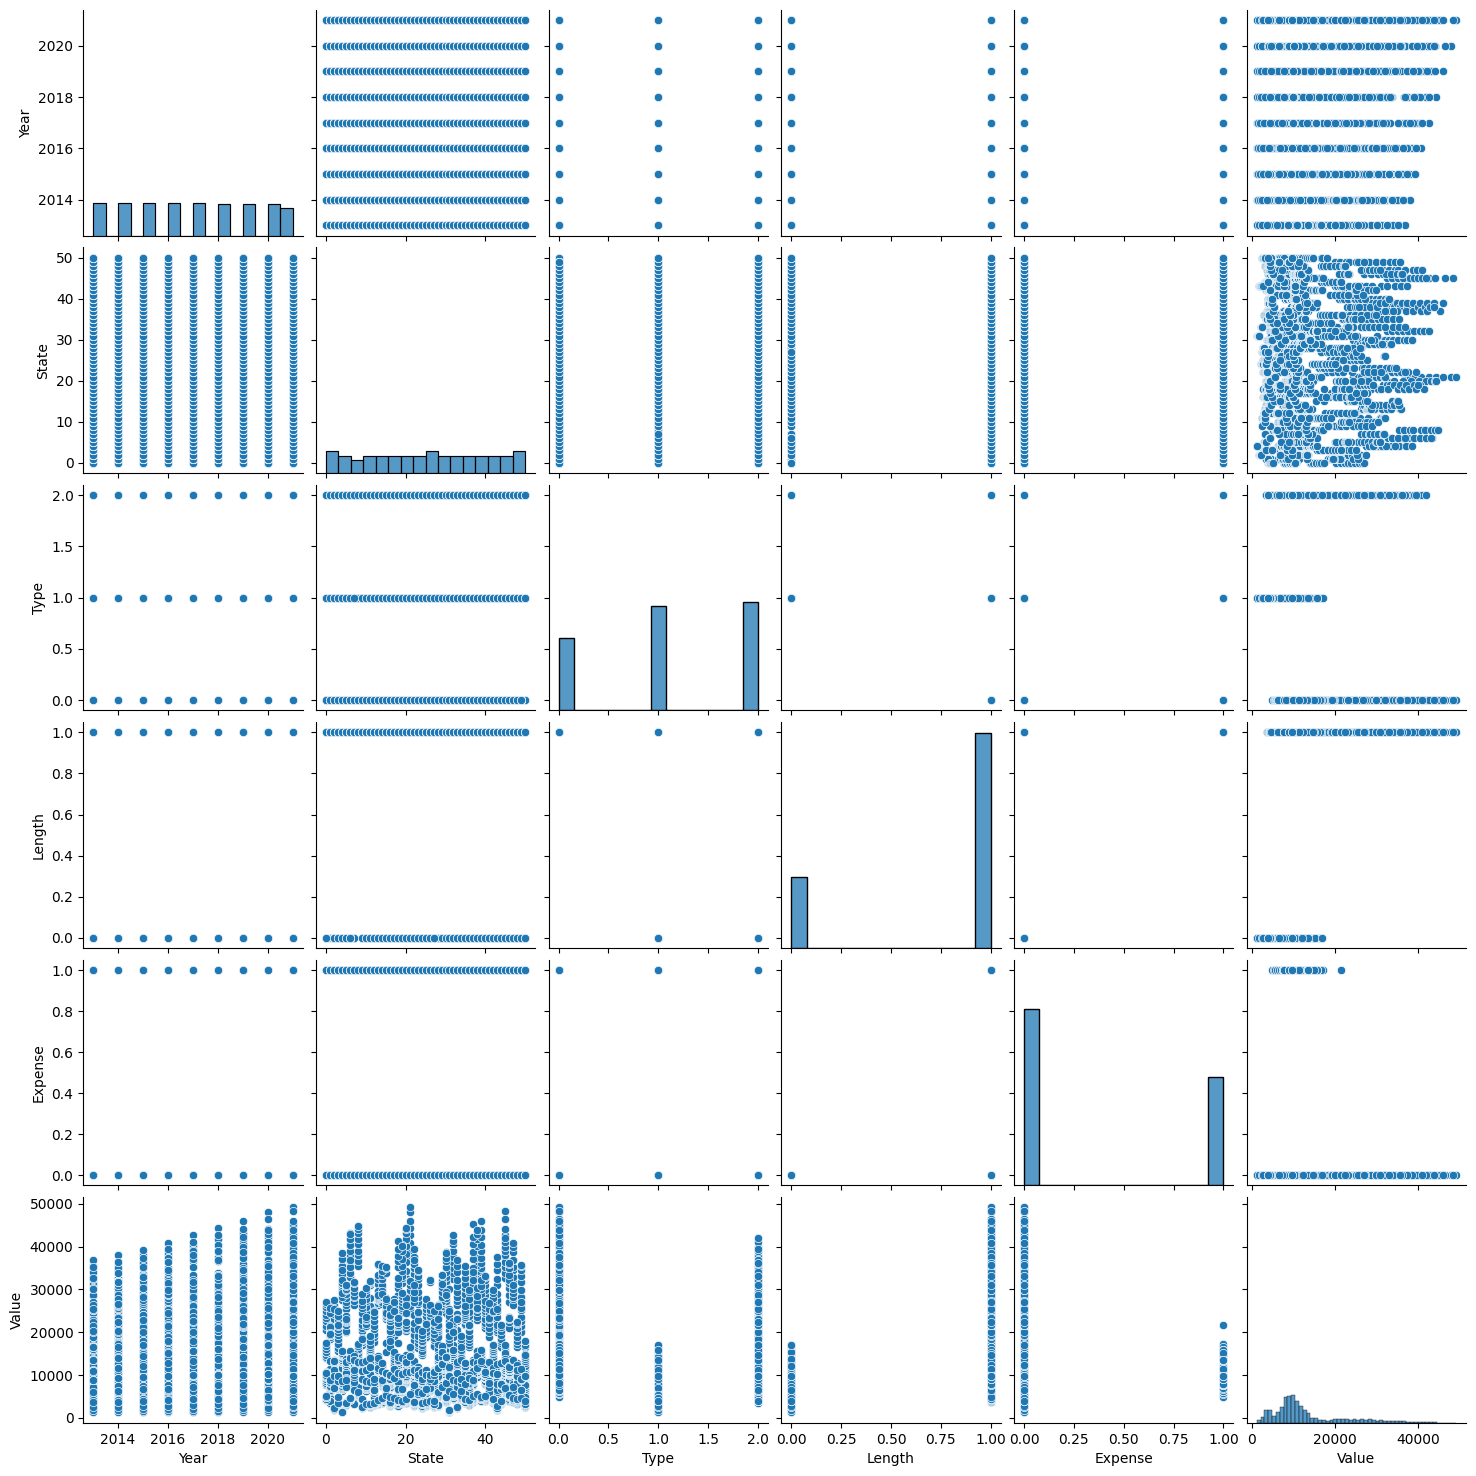

In [ ]:
sns.pairplot(data=df)

In [ ]:
df.corr()

,Year,State,Type,Length,Expense,Value
Year,1.000000,0.004419,0.002088,-0.002344,0.023528,0.130969
State,0.004419,1.000000,0.017843,-0.022437,-0.006470,0.000145
Type,0.002088,0.017843,1.000000,-0.273173,-0.124072,-0.144857
Length,-0.002344,-0.022437,-0.273173,1.000000,0.448732,0.453736
Expense,0.023528,-0.006470,-0.124072,0.448732,1.000000,-0.231775
Value,0.130969,0.000145,-0.144857,0.453736,-0.231775,1.000000


<Axes: >

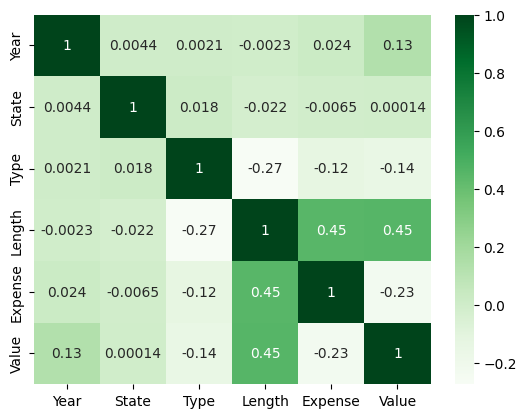

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap="Greens")

In [ ]:
df.corr()["Value"].sort_values()

Expense   -0.231775
Type      -0.144857
State      0.000145
Year       0.130969
Length     0.453736
Value      1.000000
Name: Value, dtype: float64

In [ ]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()
x=sc.fit_transform(x)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
#step:model creation
ann=Sequential()
#step2: adding input and hidden layers
ann.add(Dense(units=4,activation="relu"))
ann.add(Dense(units=4,activation="relu"))
ann.add(Dense(units=4,activation="relu"))

#step3 : output layer
ann.add(Dense(units=1))   #no activation function in regression,no metric

#step 4: compile
ann.compile(optimizer="adam",loss="mse")


#step5: training
ann.fit(xtrain,ytrain,epochs=400)



Epoch 1/400
89/89 [==============================] - 1s 1ms/step - loss: 245522912.0000
Epoch 2/400
89/89 [==============================] - 0s 1ms/step - loss: 245499584.0000
Epoch 3/400
89/89 [==============================] - 0s 1ms/step - loss: 245431792.0000
Epoch 4/400
89/89 [==============================] - 0s 1ms/step - loss: 245253216.0000
Epoch 5/400
89/89 [==============================] - 0s 1ms/step - loss: 244835616.0000
Epoch 6/400
89/89 [==============================] - 0s 2ms/step - loss: 243989136.0000
Epoch 7/400
89/89 [==============================] - 0s 1ms/step - loss: 242491968.0000
Epoch 8/400
89/89 [==============================] - 0s 1ms/step - loss: 240089088.0000
Epoch 9/400
89/89 [==============================] - 0s 1ms/step - loss: 236540512.0000
Epoch 10/400
89/89 [==============================] - 0s 1ms/step - loss: 231614480.0000
Epoch 11/400
89/89 [==============================] - 0s 1ms/step - loss: 225146320.0000
Epoch 12/400
89/89 [==========

In [ ]:
loss=pd.DataFrame(ann.history.history)
loss.head()

,loss
0,245522912.0
1,245499584.0
2,245431792.0
3,245253216.0
4,244835616.0


<Axes: >

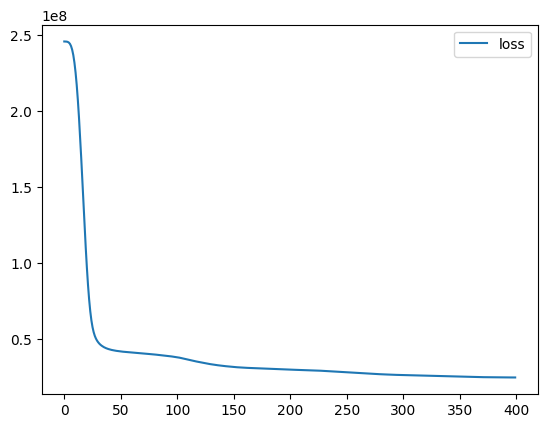

In [ ]:
loss.plot()

In [ ]:
#model.score(xtrain,ytrain)
#in ann we use evaluate
ann.evaluate(xtrain,ytrain)
ann.evaluate(xtest,ytest)


23/23 [==============================] - 0s 1ms/step - loss: 22240506.0000


22240506.0

In [ ]:
ypred=ann.predict(xtest)


23/23 [==============================] - 0s 966us/step


In [ ]:
dic={"Actual Y":ytest,"Predicted y":ypred.flatten()}
df1=pd.DataFrame(dic)


<Axes: xlabel='Actual Y', ylabel='Predicted y'>

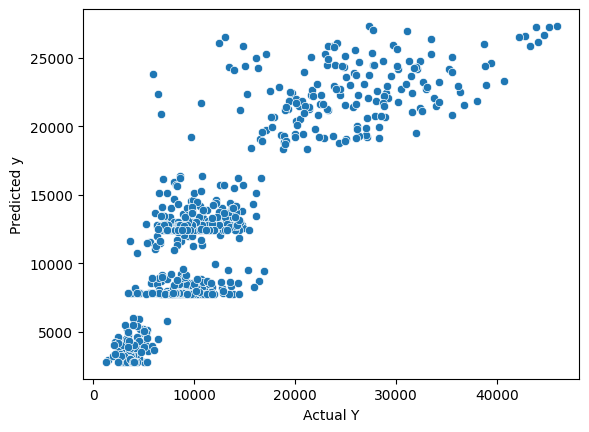

In [ ]:
sns.scatterplot(x="Actual Y",y="Predicted y",data=df1)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
print(f"MSE={mean_squared_error(ytest,ypred)}")
print(f"RMSE={np.sqrt(mean_squared_error(ytest,ypred))}")


MSE=22240508.18264744
RMSE=4715.984328074834


In [ ]:
df.head()

,Year,State,Type,Length,Expense,Value
0,2013,0.0,0.0,1.0,0.0,13983
1,2013,0.0,0.0,1.0,1.0,8503
2,2013,0.0,1.0,0.0,0.0,4048
3,2013,0.0,1.0,1.0,0.0,8073
4,2013,0.0,1.0,1.0,1.0,8473


In [ ]:
df.tail()


,Year,State,Type,Length,Expense,Value
3543,2021,50.0,1.0,0.0,0.0,3987
3544,2021,50.0,1.0,1.0,1.0,9799
3545,2021,50.0,2.0,0.0,0.0,9820
3546,2021,50.0,2.0,1.0,0.0,14710
3547,2021,50.0,2.0,1.0,1.0,9799


In [ ]:
#unknown data prediction
newd=[[2022,50.0,2.0,1.0,1.0]]
newd=sc.transform(newd)

In [ ]:
ann.predict(newd)

1/1 [==============================] - 0s 23ms/step


array([[12994.961]], dtype=float32)

In [ ]:
from tensorflow.keras.models import load_model


In [ ]:
ann.save("nces330_20")

In [ ]:
#to call model
fr=load_model("nces330_20")
fr.predict(newd)


1/1 [==============================] - 0s 52ms/step


array([[12994.961]], dtype=float32)

In [ ]:
nd=[[2022,50.0,1.0,1.0,1.0]]
nd=sc.transform(nd)
fr.predict(nd)


1/1 [==============================] - 0s 17ms/step


array([[9139.481]], dtype=float32)

In [ ]:
nd=[[2022,50.0,2.0,1.0,0.0]]
nd=sc.transform(nd)
fr.predict(nd)


1/1 [==============================] - 0s 20ms/step


array([[25911.69]], dtype=float32)

Conclusion
From above analytics we can predict that as year get increased value cost  of student get increased for 4 year course.